In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dateutil.relativedelta import *
from pylab import rcParams

#import warnings
import itertools
#warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'

plt.style.use('seaborn')

# Read datasets

In [53]:
df1 = pd.read_csv('C:/Users/20190041/Desktop/Datachef assignment/customer_transactions_history-main/transactions_1.csv')
df2 = pd.read_csv('C:/Users/20190041/Desktop/Datachef assignment/customer_transactions_history-main/transactions_2.csv')
df = pd.concat ([df1,df2], axis=0, ignore_index=True).drop(['Unnamed: 0'], axis=1)

In [54]:
df['date']= pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

#### 1) Create an ordered (descending) plot that shows the total number of transactions per customer from the most active customer to the least active one.

In [60]:
# Count total sales to each customer

supplier_count = df.groupby(['customer_id']).size().reset_index()
supplier_count.columns=['Customer_id', 'Order_count']
supplier_count['Customer_id']= supplier_count['Customer_id'].astype('str')

In [61]:
# Visualize the amount of sales to customers on the descending order

supplier_count= supplier_count.sort_values('Order_count',ascending=False).reset_index(drop=True)
supplier_count_top= supplier_count.head(50)

fig = px.bar(supplier_count_top, x='Customer_id', y='Order_count')
fig.show()

#### 2) Given any product ID, create a plot to show its transaction frequency per month for the year 2018

- The example with one product is given here. General analysis for the combination of all the customer-product-year is available in the dashboard

In [62]:
df_2018 = df[df['year'] == 2018]
product_count_monthly = pd.DataFrame(df_2018.groupby(['product_id', 'month']).size().rename('order_counts').sort_values(ascending=False).reset_index())

In [64]:
# Monthly sales of "Ford" in the year 2018

product_count_monthly_ford = product_count_monthly[product_count_monthly['product_id'] == 'Ford']

fig = px.bar(product_count_monthly_ford, x='month', y='order_counts')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(1,13),
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    )
)
fig.show()

#### 3) Given any Customer_id, is there a seasonality effect in this data set?

- The example with one customer is given here. 

In [68]:
# Daily sales to customers

daily_count = df.groupby(['customer_id', 'date']).size().reset_index()
daily_count.columns=['customer_id', 'date', 'Order_count']
daily_count= daily_count.sort_values(['date'],ascending=True).reset_index(drop=True)
daily_count['date'] = pd.to_datetime(daily_count['date'])
print(daily_count.head())

   customer_id       date  Order_count
0      9447359 2017-01-01            1
1      3926262 2017-01-01            2
2      4275069 2017-01-01            3
3      9467115 2017-01-01            1
4      4121261 2017-01-01            1


In [69]:
# Filter on one customer

customer_1 = daily_count[daily_count['customer_id'] == 8649525]

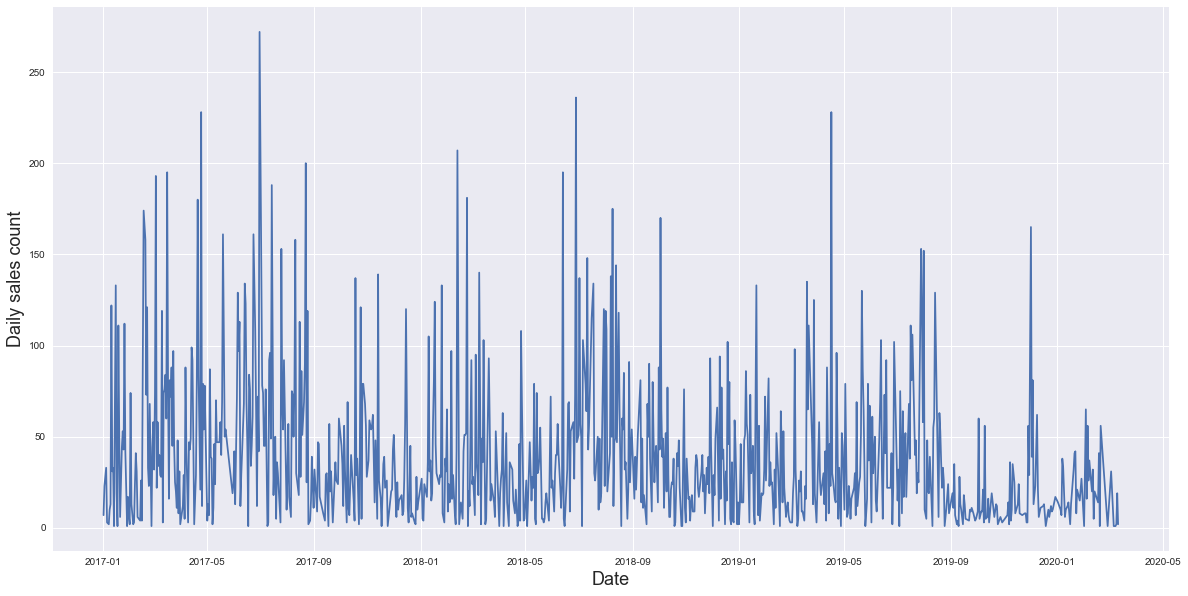

In [87]:
# Daily sales to customer "8649525"

plt.figure(figsize=(20,10))
plt.plot(customer1['date'], customer1['Order_count'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily sales count', fontsize=18)
plt.show()

In [76]:
# Calculate monthly sales to customer "8649525"

sales = customer_1.copy()
#represent month in date field as its first day
sales['date'] = sales['date'].dt.year.astype('str') + '-' + sales['date'].dt.month.astype('str') + '-01'
sales['date'] = pd.to_datetime(sales['date'])
#groupby date and sum the sales
sales = sales.groupby('date').Order_count.sum().reset_index()
y = sales.set_index('date')

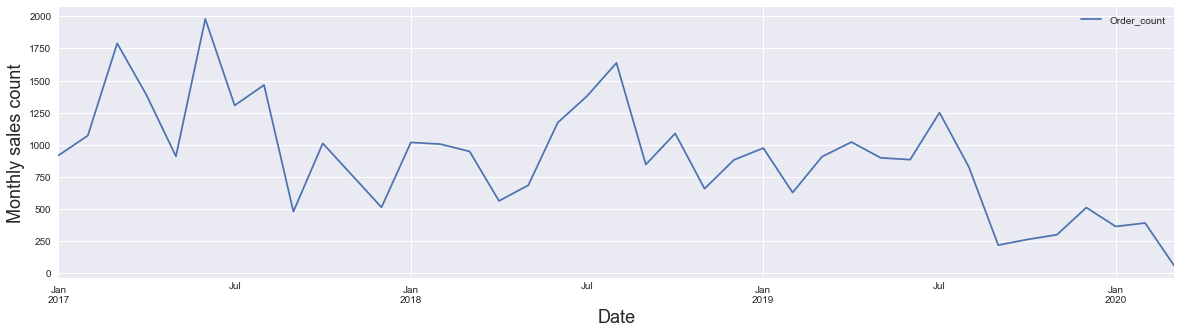

In [78]:
# Plot monthly sales to customer "8649525"

y.plot(figsize=(20, 5))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Monthly sales count', fontsize=18)
plt.show()

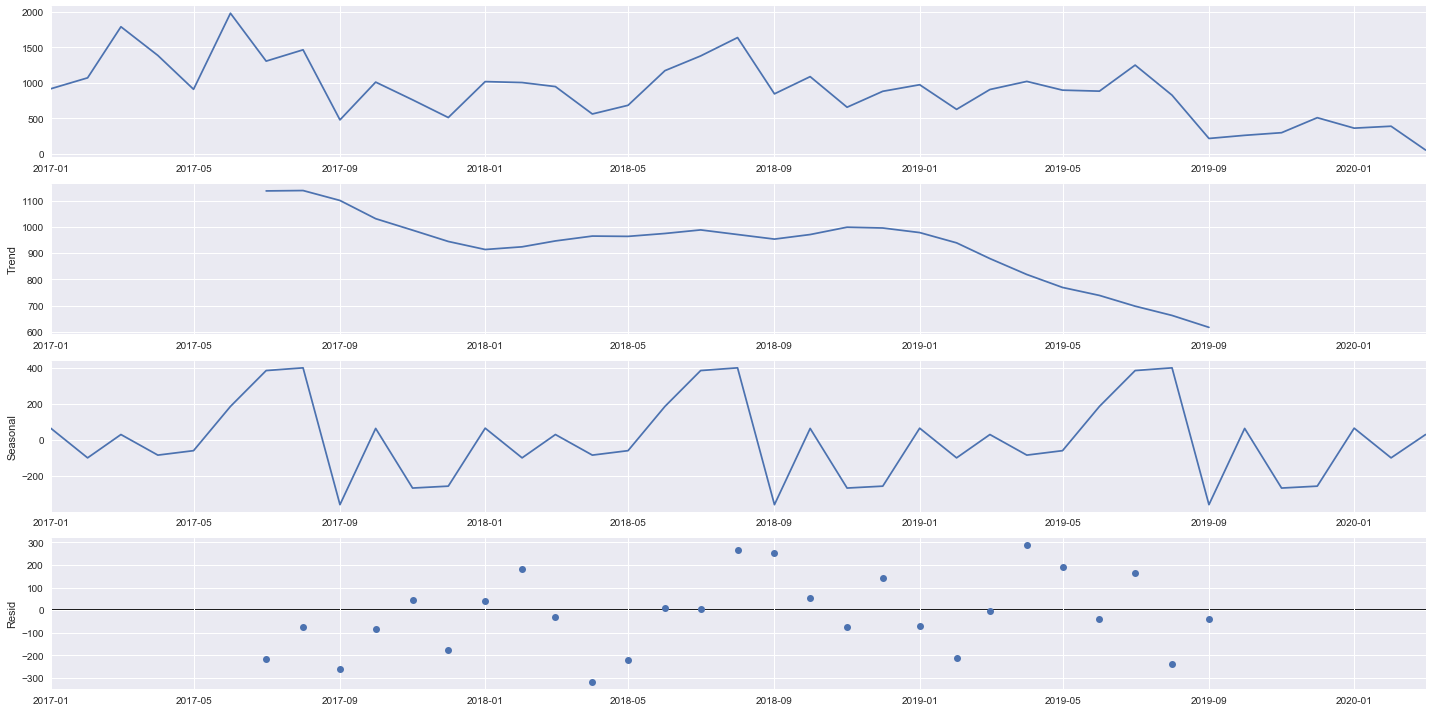

In [83]:
# Chech the seasonality of the data

rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


- It is observed that the data has seasonality, as there is a repeating pattern during each year, with a peak between month 5 to month 9
- A decreasing trend in the longterm is also observed in the data.